# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=None
pd.options.display.max_rows=500

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df=pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [3]:
#Ok go back and read in a subset only
df=pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000)
df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a license for an individual dog in NYC.  Vaccinated is a binary variable for whether the dog is vaccinated.  Spayed or neutered is a variable for whether the dog is spayed, neutered, or neither.  

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1.  Was there really a surge in pandemic dog adoptions?  What were the most popular pets by ave. income of the owner's zip code?
2.  Get survey data on extent people want to go back to in person work.  Is there a relationship between new dog ownership and desire to go back to the office
3.  What kinds of dogs live on Billionaire's row?  Do richer people give their dogs really long names?
4.  What human names are the most common dog names and what kinds of dogs get human names?


# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

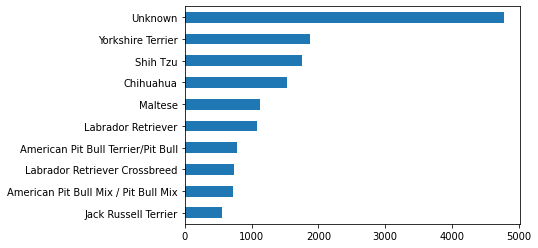

In [4]:
df.columns=df.columns.str.lower().str.replace(" ", "_")

df.primary_breed.value_counts().head(10).sort_values().plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

<AxesSubplot:>

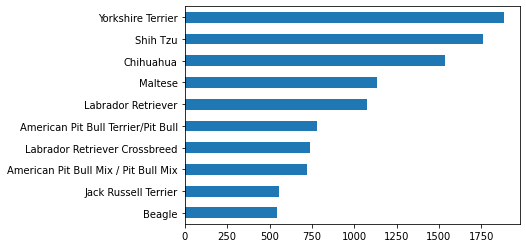

In [5]:

df=pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=["Unknown", "UNKNOWN", "unknown"])
df.head()
df.columns=df.columns.str.lower().str.replace(" ", "_")
df.primary_breed.value_counts().head(10).sort_values().plot(kind="barh")

## What are the most popular dog names?

In [6]:
df.animal_name.value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: animal_name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [7]:
df.query("animal_name.str.lower()=='max'").shape

(256, 15)

In [8]:
df.query("animal_name.str.lower()=='maxwell'").shape

(13, 15)

## What percentage of dogs are guard dogs?

In [9]:
df.guard_or_trained.value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: guard_or_trained, dtype: float64

## What are the actual numbers?

In [10]:
df.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [11]:
df.guard_or_trained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: guard_or_trained, dtype: int64

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [12]:
df.guard_or_trained.value_counts(normalize=True, dropna=False)

#So the percent of guard dogs is between .0567% and .0857%

No     0.660300
NaN    0.339133
Yes    0.000567
Name: guard_or_trained, dtype: float64

## What are the top dog breeds for guard dogs? 

In [13]:
df.query("guard_or_trained=='Yes'").primary_breed.value_counts().head(20)

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: primary_breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [14]:
df["birth_y"]=df.animal_birth.apply(lambda y: y.year)
df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,birth_y
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [15]:
df["issue_y"]=df.license_issued_date.apply(lambda y: y.year)
df["age"]=(df.license_issued_date-df.animal_birth)
df.age.mean()
#I can't figure out how to change timedelta to years for some reason. 

#Ugh, changing to the very approximate year subtraction approach
df["age2"]=(df.issue_y-df.birth_y)
df.age2.mean()

# df.dtypes
# df.age.years
#df.head()



5.661266666666666

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [16]:
zip=pd.read_csv("zipcodes-neighborhoods.csv")
zip.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [17]:
merged = df.merge(zip, left_on='owner_zip_code', right_on='zip')
merged.head(2)

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,birth_y,issue_y,age,age2,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,2015,2879 days,8,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,2014,2328 days,6,Upper West Side,10024,Manhattan


In [18]:
df=merged

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [53]:
bs=df.borough.unique()
for b in bs:
     print(b)
     print(df[df.borough==b].animal_name.value_counts().head(5))



Manhattan
Lola       71
Lucy       67
Charlie    65
Max        57
Bella      51
Name: animal_name, dtype: int64
Bronx
Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: animal_name, dtype: int64
Brooklyn
Max        46
Bella      45
Charlie    42
Rocky      36
Lucy       32
Name: animal_name, dtype: int64
Staten Island
Max       27
Bella     25
Buddy     16
Rocky     16
Bailey    14
Name: animal_name, dtype: int64
Queens
Max        50
Bella      48
Rocky      40
Charlie    39
Coco       35
Name: animal_name, dtype: int64


## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [21]:
for b in bs:
    print(b)
    print(df[df.borough==b].primary_breed.value_counts().head(1))



Bronx
Yorkshire Terrier    250
Name: primary_breed, dtype: int64
Brooklyn
Yorkshire Terrier    501
Name: primary_breed, dtype: int64
Manhattan
Chihuahua    511
Name: primary_breed, dtype: int64
Queens
Yorkshire Terrier    434
Name: primary_breed, dtype: int64
Staten Island
Yorkshire Terrier    171
Name: primary_breed, dtype: int64


## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [45]:
#First just restrict to the females.
#The calculate the share spayed by breed
#Then sort.

#1.  Make a female subset
f=df.query("animal_gender=='F'")

#2. Generate a var spayed that is =1 if YES
f["spayed"]=f.spayed_or_neut.replace({
    "Yes": 1,
    "No": 0
})
f[["spayed", "spayed_or_neut"]].head()

#3.  Figure out which breed has highest mean of spayed.
f.groupby(by="primary_breed")\
    .spayed.mean()\
    .sort_values(ascending=False)

#This isn't super satisfying since there are some breeds that have really few dogs.  
#Only list breeds that have a decent number of animals
dftemp=f.primary_breed.value_counts()
merged=f.merge(dftemp,
         left_on="primary_breed",
         right_index=True)
merged = merged.rename(columns={'primary_breed_y': 'breed_pop'})
merged.head(2)

#Now show again for breeds with more than 50 dogs (or something)
merged.query("breed_pop>50").groupby(by="primary_breed")\
    .spayed.mean()\
    .sort_values(ascending=False).head()



/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_62428/2593901037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["spayed"]=f.spayed_or_neut.replace({


primary_breed
Labrador Retriever Crossbreed    0.981183
Beagle Crossbreed                0.973684
German Shepherd Crossbreed       0.968750
Terrier mix                      0.955224
Cairn Terrier                    0.947368
Name: spayed, dtype: float64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [36]:
#change everything to lower case
df.animal_dominant_color=df.animal_dominant_color.str.lower()
df.animal_secondary_color=df.animal_secondary_color.str.lower()
df.animal_third_color=df.animal_third_color.str.lower()
df.head()

#now generate variables for whether each of the 3 color vars contain the monochrome colors
df["mono1"]=df.animal_dominant_color.str.match("black|white|grey|gray")
df["mono2"]=df.animal_secondary_color.str.match("black|white|grey|gray")
df["mono3"]=df.animal_third_color.str.match("black|white|grey|gray")

#If any of these are false, the dog is non monochrome.
df["mono"]=df[["mono1","mono2", "mono3"]].all(axis='columns', skipna=True)
df[["animal_dominant_color", "animal_secondary_color", "animal_third_color", "mono"]].head(20)

df.mono.value_counts()

False    21301
True      8272
Name: mono, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

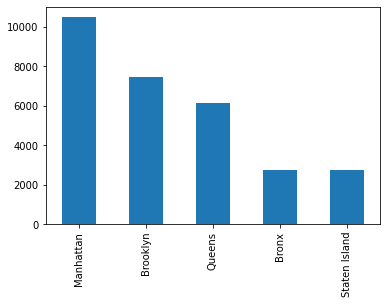

In [44]:
df.borough.value_counts().plot(kind="bar")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

### This seems long.  Is there a better way?

In [26]:

#Get the borough level dog pop counts
df_b = df.borough.value_counts()
df_b.head()

#Read in the borough pop data
pop=pd.read_csv("boro_population.csv")
pop.head()

#Merge the two -- start with the one that is not an index merge
merged=pop.merge(df_b,
         left_on="borough",
         right_index=True)
merged = merged.rename(columns={'borough_y': 'dogpop'})
merged.head()

#Generate dog pop per cap
merged["dogs_per_cap"]=merged.dogpop/merged.population

#Sort
merged.sort_values(by="dogs_per_cap", ascending=False)


,borough,borough_x,population,area_sqmi,dogpop,dogs_per_cap
0,Manhattan,Manhattan,1644518,23,10478,0.006371
4,Staten Island,Staten Island,474558,59,2727,0.005746
2,Brooklyn,Brooklyn,2636735,71,7466,0.002832
3,Queens,Queens,2339150,109,6154,0.002631
1,Bronx,Bronx,1455444,42,2748,0.001888


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [27]:
df.groupby(by="borough").primary_breed.value_counts()

borough        primary_breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
                                                    ... 
Staten Island  Tibetan Spaniel                         1
               Treeing Tennessee Brindle               1
               Welsh Corgi, Cardigan                   1
               West Highland White Terrier             1
               Whippet                                 1
Name: primary_breed, Length: 899, dtype: int64